### VP of Product: Which product line should we expand?

- Is there a product category that is particularly profitable for us?
- Does one or another stand out in terms of sales volume? 
- Does this vary by customer segment?

In [96]:
# from env import get_db_url
import pandas as pd
import prepare
alpha = 0.05

import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams.update({'font.size': 16})

In [3]:
# df = acquire_stephen.get_superstore_data()

In [4]:
df = prepare.prepare_superstore_data()

Reading csv file..


In [298]:
df["profit_per_quantity"] = df.profit/df.quantity

Text(0.5, 1.0, 'Monthly Sales Volume (Quantity)')

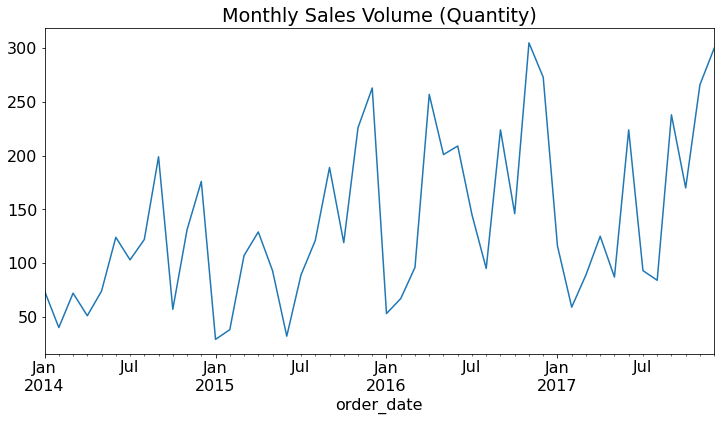

In [97]:
df.resample('M').sum().quantity.plot()
plt.title("Monthly Sales Volume (Quantity)")

Text(0.5, 1.0, 'Monthly Profit')

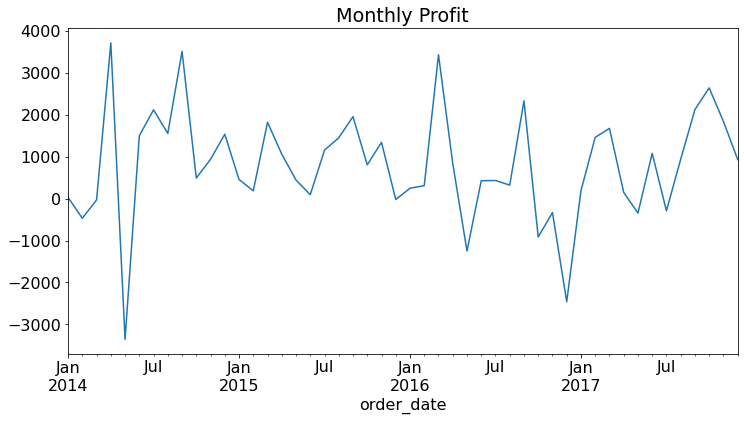

In [98]:
df.resample('M').sum().profit.plot()
plt.title("Monthly Profit")

## Split data

In [99]:
train = df.loc['2014':'2015']
validate = df.loc['2016']
test = df.loc['2017']

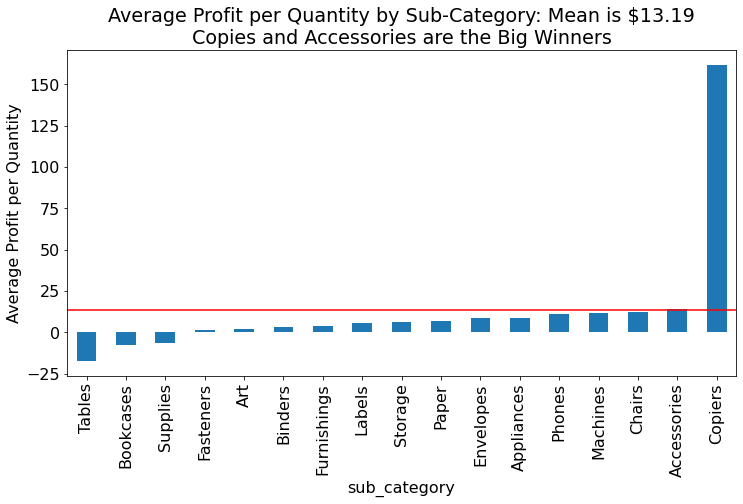

In [306]:
mean_profit = df.groupby("sub_category").profit_per_quantity.mean().mean()
df.groupby("sub_category").profit_per_quantity.mean().sort_values().plot.bar()
plt.title(f'Average Profit per Quantity by Sub-Category: Mean is ${mean_profit:.2f}\nCopies and Accessories are the Big Winners')
plt.ylabel('Average Profit per Quantity')
plt.axhline(mean_profit, color='r')

## Total profit by subcategory

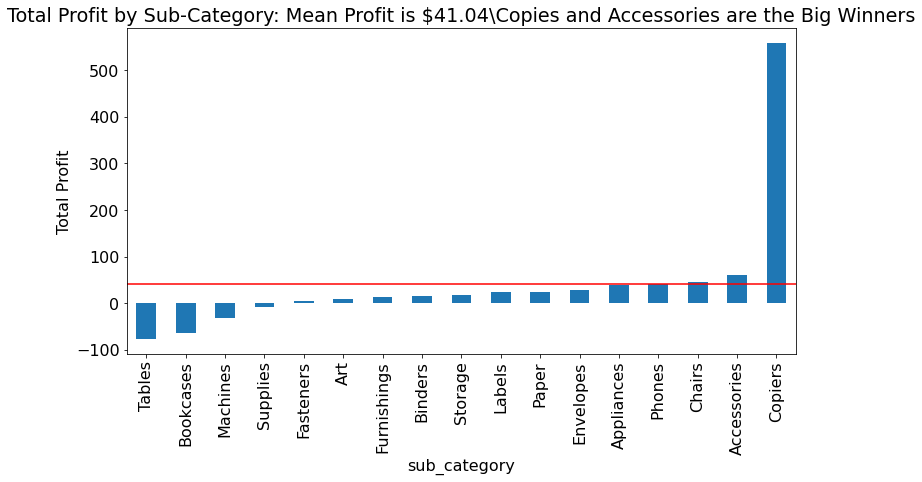

In [294]:
mean_profit = df.groupby("sub_category").profit.mean().mean()
df.groupby("sub_category").profit.mean().sort_values().plot.bar()
plt.title(f'Total Profit by Sub-Category: Mean Profit is ${mean_profit:.2f}\Copies and Accessories are the Big Winners')
plt.ylabel('Total Profit')
plt.axhline(mean_profit, color='r')

In [292]:
for sub in df["sub_category"].unique():
    overall_mean = df.profit.mean()
    print(overall_mean)
    sample = df[df["sub_category"] == sub].profit
    t,p = stats.ttest_1samp(sample, overall_mean)
    if (t>0)&(p/2<alpha):
            print(sub, "samples: ",len(sample), "t:", round(t,2), "p", round(p,4))
        print("Significant Higher ", sub)
    if (t<0)&(p/2<alpha):
        print("Significant Lower ", sub)

21.88035138408307
Bookcases samples:  35 t: -1.57 p 0.1251
21.88035138408307
Chairs samples:  95 t: 1.78 p 0.0784
Significant Higher  Chairs
21.88035138408307
Tables samples:  62 t: -3.4 p 0.0012
Significant Lower  Tables
21.88035138408307
Storage samples:  162 t: -0.97 p 0.3312
21.88035138408307
Paper samples:  224 t: 1.1 p 0.271
21.88035138408307
Furnishings samples:  168 t: -2.22 p 0.0281
Significant Lower  Furnishings
21.88035138408307
Appliances samples:  71 t: 1.04 p 0.3012
21.88035138408307
Binders samples:  263 t: -0.39 p 0.695
21.88035138408307
Envelopes samples:  48 t: 1.38 p 0.1736
21.88035138408307
Accessories samples:  131 t: 3.17 p 0.0019
Significant Higher  Accessories
21.88035138408307
Phones samples:  157 t: 2.72 p 0.0073
Significant Higher  Phones
21.88035138408307
Art samples:  149 t: -9.37 p 0.0
Significant Lower  Art
21.88035138408307
Supplies samples:  28 t: -3.31 p 0.0026
Significant Lower  Supplies
21.88035138408307
Labels samples:  67 t: 0.17 p 0.8633
21.880351

### Which subcategory belongs to which category?

In [293]:
for cat in df["category"].unique():
    sample = df[df["category"] == cat]
    print(cat)
    print(sample.sub_category.unique())

Furniture
['Bookcases' 'Chairs' 'Tables' 'Furnishings']
Office Supplies
['Storage' 'Paper' 'Appliances' 'Binders' 'Envelopes' 'Art' 'Supplies'
 'Labels' 'Fasteners']
Technology
['Accessories' 'Phones' 'Machines' 'Copiers']


## Profit by category

In [296]:
df.groupby("category").profit.sum()

category
Furniture           -623.2451
Office Supplies    19312.4297
Technology         19251.3447
Name: profit, dtype: float64

In [277]:
df.profit.mean()

21.88035138408307

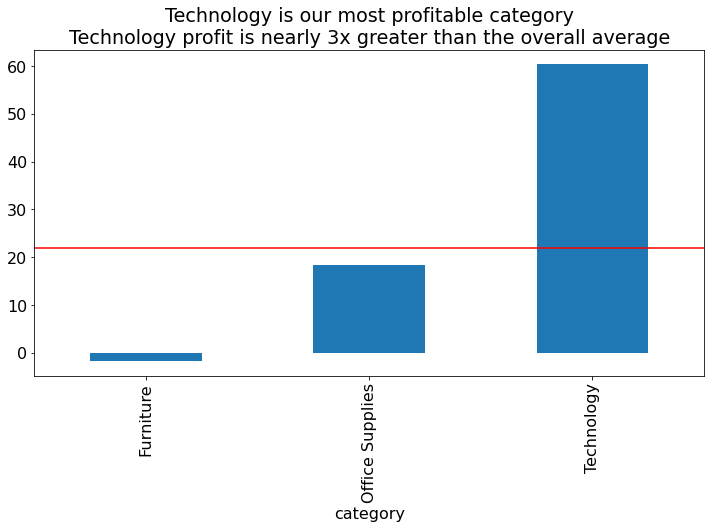

In [287]:
df.groupby("category").profit.mean().plot.bar()
plt.title('Technology is our most profitable category\nTechnology profit is nearly 3x greater than the overall average')
plt.axhline(df.profit.mean(), color = 'r')

In [283]:
for cat in df["category"].unique():
    overall_mean = df.profit.mean()
    print(overall_mean)
    sample = df[df["category"] == cat].profit
    t,p = stats.ttest_1samp(sample, overall_mean)
    print(cat, "samples: ",len(sample), "t:", round(t,2), "p", round(p,4))
    if (t>0)&(p/2<alpha):
        print("Significant Higher ", cat)
    if (t<0)&(p/2<alpha):
        print("Significant Lower ", cat)

21.88035138408307
Furniture samples:  360 t: -2.74 p 0.0065
Significant Lower  Furniture
21.88035138408307
Office Supplies samples:  1055 t: -0.82 p 0.4133
21.88035138408307
Technology samples:  319 t: 1.94 p 0.0531
Significant Higher  Technology


### Average Profit from Technology is significantly higher than the overall average

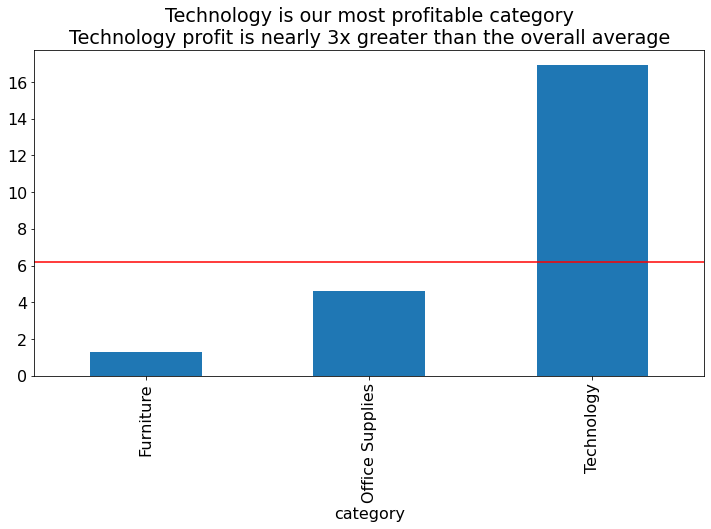

In [302]:
df.groupby("category").profit_per_quantity.mean().plot.bar()
plt.title('Technology is our most profitable category\nTechnology profit is nearly 3x greater than the overall average')
plt.axhline(df.profit_per_quantity.mean(), color = 'r')

## Profit by customer segment

Text(0, 0.5, 'Average Profit per Quantity')

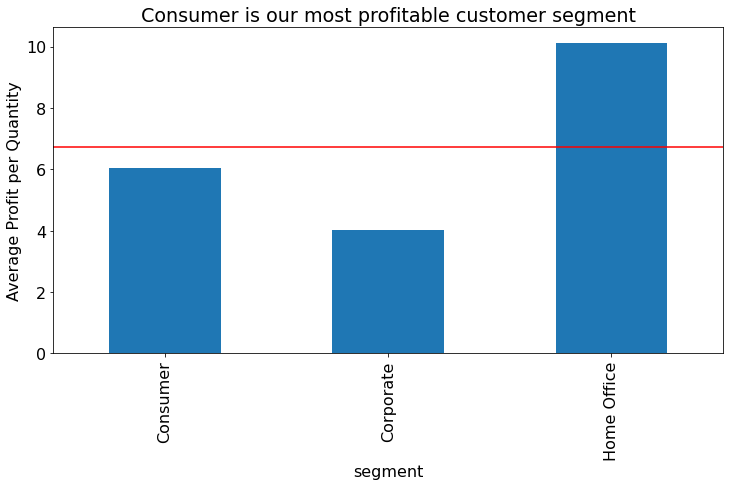

In [305]:
df.groupby("segment").profit_per_quantity.mean().plot.bar()
plt.title('Consumer is our most profitable customer segment')
plt.axhline(df.groupby("segment").profit_per_quantity.mean().mean(), color='r')
plt.ylabel('Average Profit per Quantity')

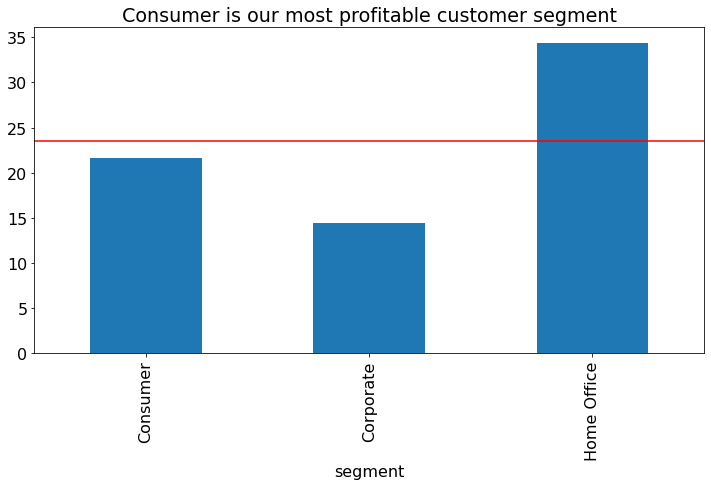

In [288]:
df.groupby("segment").profit.mean().plot.bar()
plt.title('Consumer is our most profitable customer segment')
plt.axhline(df.groupby("segment").profit.mean().mean(), color='r')

In [289]:
for seg in df["segment"].unique():
    overall_mean = df.profit.mean()
    sample = df[df["segment"] == seg].profit
    t,p = stats.ttest_1samp(sample, overall_mean)
    print(seg, t, p)
    if (t>0)&(p/2<alpha):
        print("Significantly Higher ", seg)
    if (t<0)&(p/2<alpha):
        print("Significantly Lower ", seg)

Consumer -0.03445293621343272 0.9725231861326742
Corporate -0.7047901450011024 0.48128481804380385
Home Office 1.10146674811096 0.2715735655988104


#### No customer groups are significant

### If we look at product category by customer segment are any significantly more profitable?

In [290]:
overall_mean_profit = df.profit.mean()
for seg in df["segment"].unique():
    for cat in df.category.unique():
        sample = df[(df.segment == seg)&(df.category == cat)].profit
        if len(sample) >30:
            t,p = stats.ttest_1samp(sample, overall_mean)
            used = 'ttest'
        else:
            t,p = stats.wilcoxon(sample)
            used = 'wilcoxon'
        if (t>0)&(p/2<alpha):
            print("Significantly Higher ", seg, cat, used)
        if (t<0)&(p/2<alpha):
            print("Significantly Lower ", seg, cat, used)

Significantly Lower  Consumer Furniture ttest
Significantly Higher  Consumer Technology ttest
Significantly Higher  Home Office Technology ttest


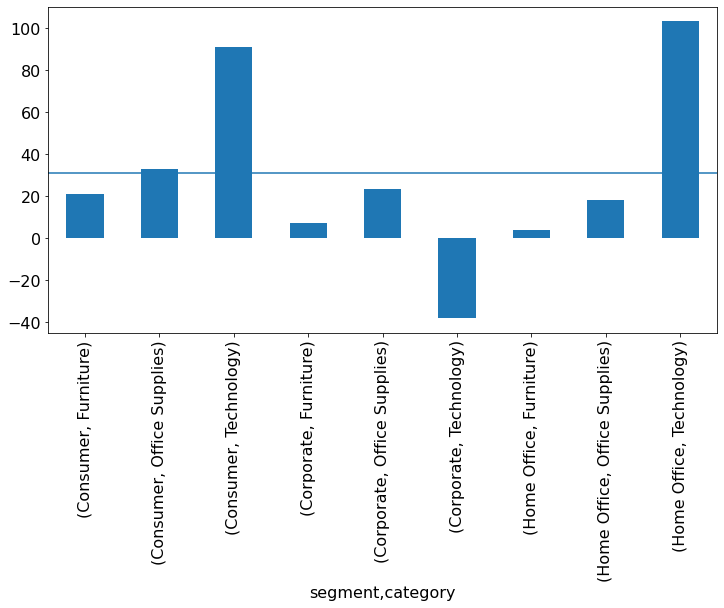

In [272]:
train.groupby(["segment","category"]).profit.mean().plot.bar()
plt.axhline(train.profit.mean())

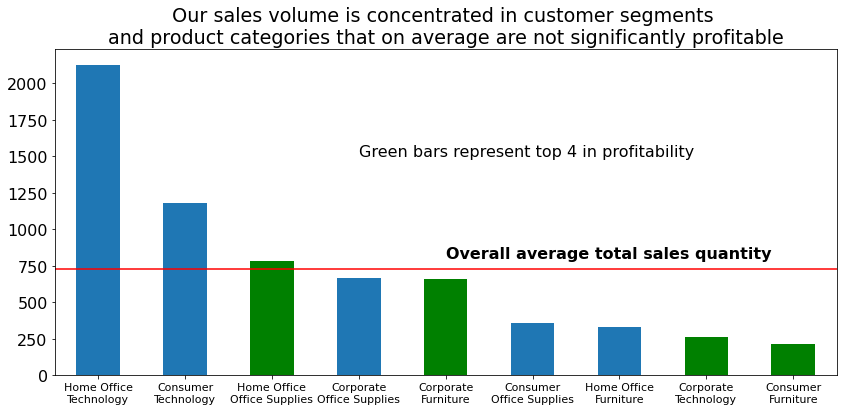

In [340]:
profit_by_seg_cat = df.groupby(["segment","category"]).profit.mean().sort_values(ascending=False)
# Grab the xtick labels
l=profit_by_seg_cat.index.tolist()
# Original index values are multiindex, not great for plotting. This adds a new line between segment and category
xlabs=[i[0]+"\n"+i[1] for i in l]
# Colors bars based on if they are in the top 4 profitable segment/category combo
clrs=['green' if (x in profit_by_seg_cat.head(4).index) else '#1f77b4' for x in df.groupby(["segment","category"]).quantity.sum().index]
ax1=df.groupby(["segment","category"]).quantity.sum().sort_values(ascending=False).plot.bar(color=clrs)

plt.axhline(df.groupby(["segment","category"]).quantity.sum().mean(), color = 'r')
plt.title("Our sales volume is concentrated in customer segments \nand product categories that on average are not significantly profitable")
plt.annotate("Green bars represent top 4 in profitability", xy=(3, 1500))
plt.annotate("Overall average total sales quantity",xy=(4,800), fontweight='bold')
ax1.set_xticklabels(xlabs)
plt.xlabel("")
plt.xticks(fontsize=11, rotation = 0)
plt.tight_layout()
plt.show()

[]

### Consumer segment - technology profit is significantly higher than overall average
- Corporate furniture and home office office supplies significantly lower

### How does sales volume change overall?

### How does the sales volume change by category?

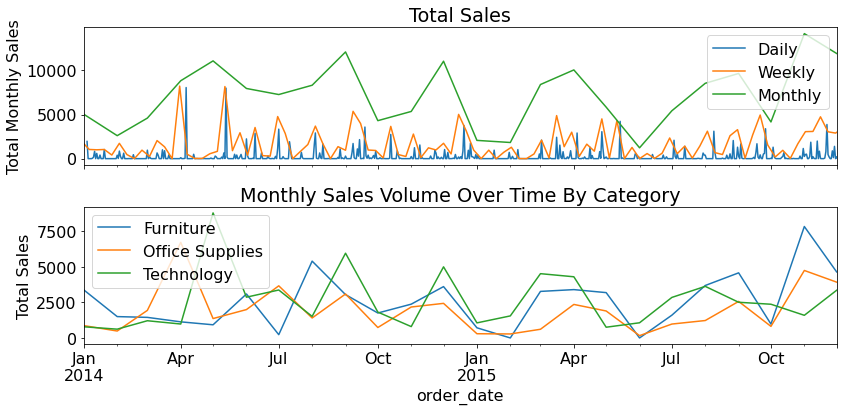

In [103]:
fig, axs= plt.subplots(2, sharex=True)

train.resample('D').sales.sum().plot(label = 'Daily',ax=axs[0])
train.resample('W').sales.sum().plot(label = 'Weekly',ax=axs[0])
train.resample('M').sales.sum().plot(label = 'Monthly',ax=axs[0])
axs[0].set_title('Total Sales')
axs[0].set_ylabel('Total Monthly Sales')
axs[0].legend()

for cat in train.category.unique():
    sample = train[train.category == cat]
    sample.resample('M').sales.sum().plot(label=cat, ax=axs[1])
    plt.legend()
axs[1].set_title("Monthly Sales Volume Over Time By Category")
# plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.tight_layout()

Text(0, 0.5, 'Total Sales')

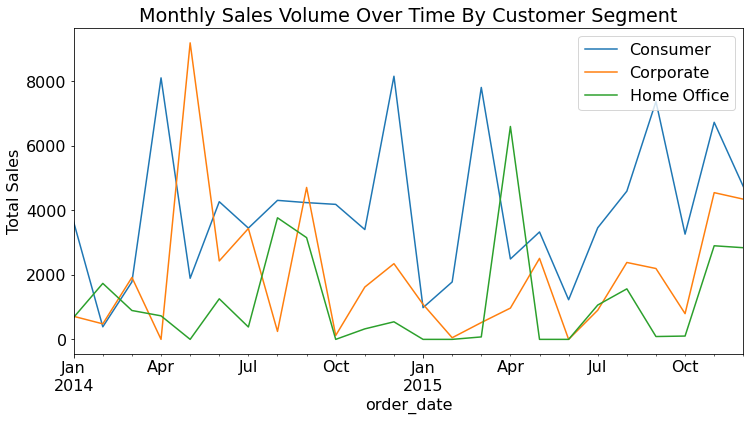

In [104]:
for seg in train.segment.unique():
    sample = train[train.segment == seg]
    sample.resample('M').sales.sum().plot(label=seg)
    plt.legend()
plt.title("Monthly Sales Volume Over Time By Customer Segment")
# plt.xlabel("Order Date")
plt.ylabel("Total Sales")

## Takeaway:
- Furniture and Technology sales seem to follow similar trends: when you buy a new computer you need a new desk?
- Technology sales are generally higher than the other two categories
- Office Supplies is generally lower in total sales than the other two categories
- No clear seasonality is discernable from this chart

### How does sales volume change by category for each customer segment (Consumer, Corporate, Home Office)

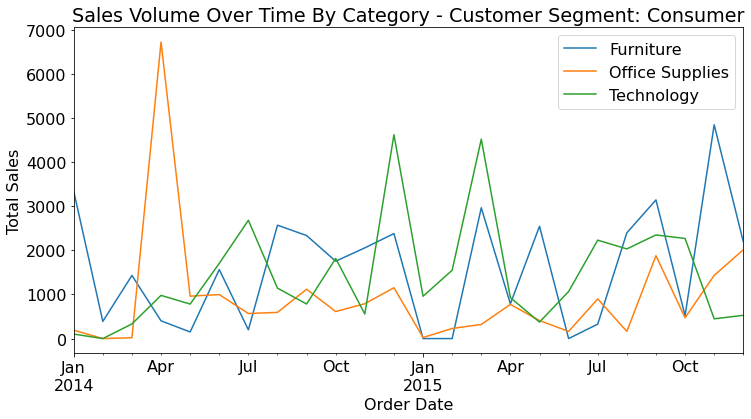

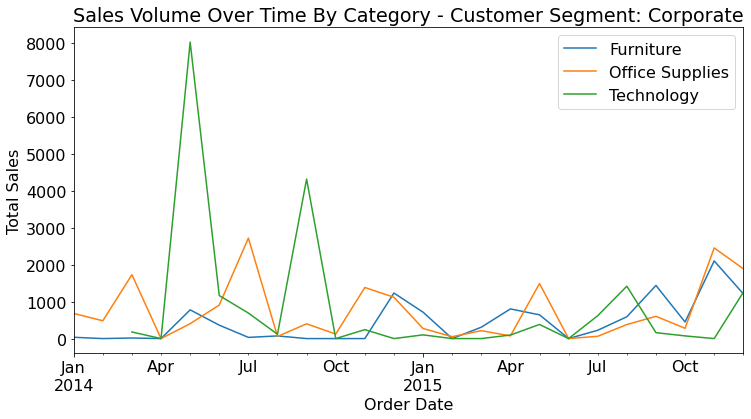

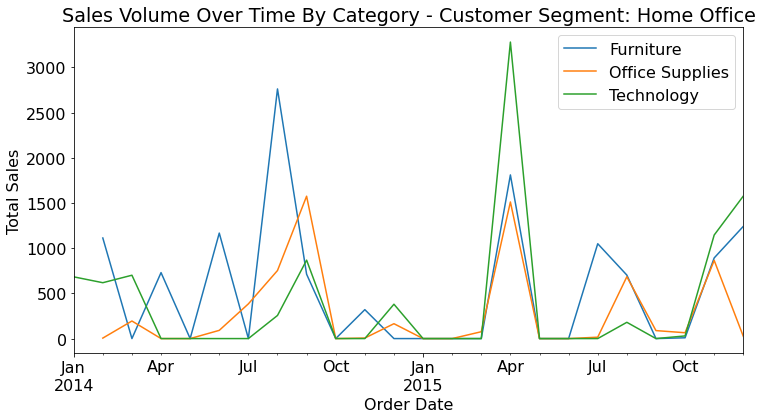

In [105]:
# Plot sales volume by category - different plot for each customer segment
for seg in train.segment.unique():
    for cat in train.category.unique():
        sample = train[(train.category == cat)&(train.segment == seg)]
        sample.resample('M').sales.sum().plot(label=cat)
        plt.legend()
    plt.title(f"Sales Volume Over Time By Category - Customer Segment: {seg}")
    plt.xlabel("Order Date")
    plt.ylabel("Total Sales")
    plt.show()

### Consumer Customer Segment:
- With the exception of a big spike in office supply volume in April 2014, office supplies are nearly always the lowest in sales volume

### Corporate Customer Segment:
- In contrast, with the exception of a big spike in technology in May 2014, technology is generally pretty low for corporate customers

### Home office segment:
- Sales volume generally quite low overall. Big spikes in all categories in April 2015 , sale?

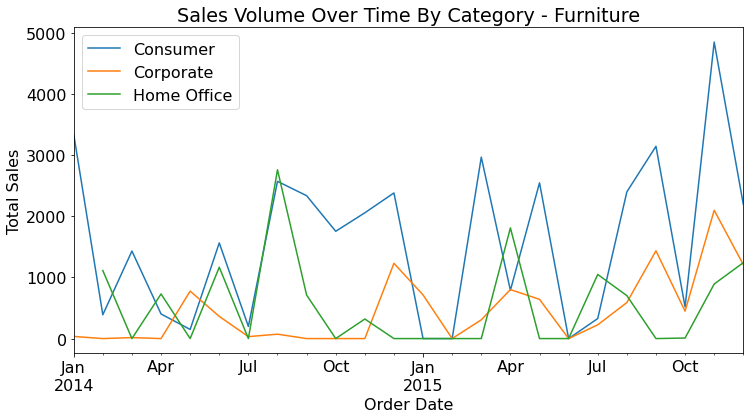

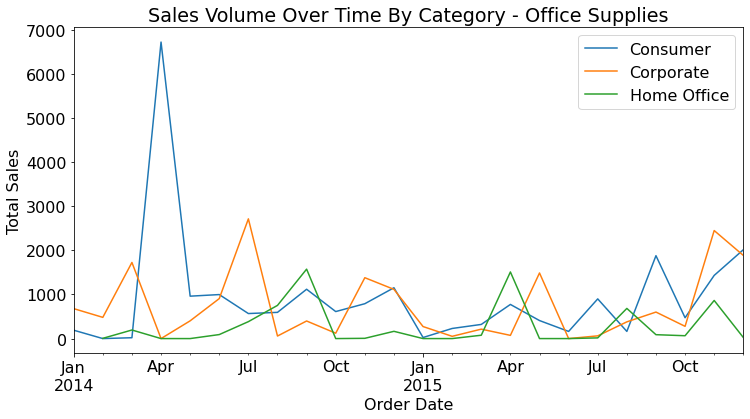

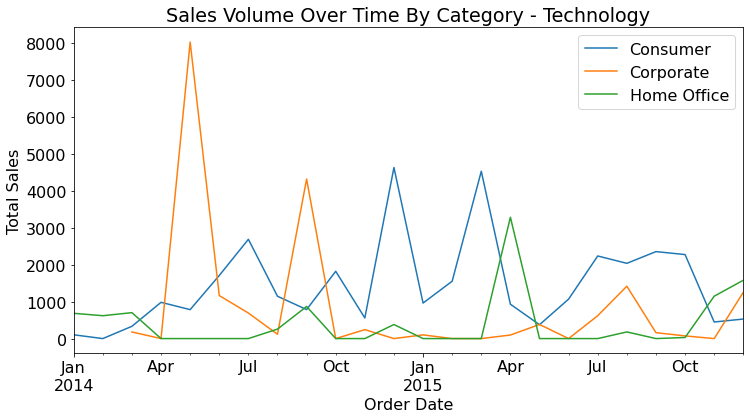

In [106]:
# Plot sales volume by category - different plot for each product category

for cat in train.category.unique():
    for seg in train.segment.unique():
        sample = train[(train.category == cat)&(train.segment == seg)]
        sample.resample('M').sales.sum().plot(label=seg)
        plt.legend()
    plt.title(f"Sales Volume Over Time By Category - {cat}")
    plt.xlabel("Order Date")
    plt.ylabel("Total Sales")
    plt.show()

### How does average sales volume change month to month?

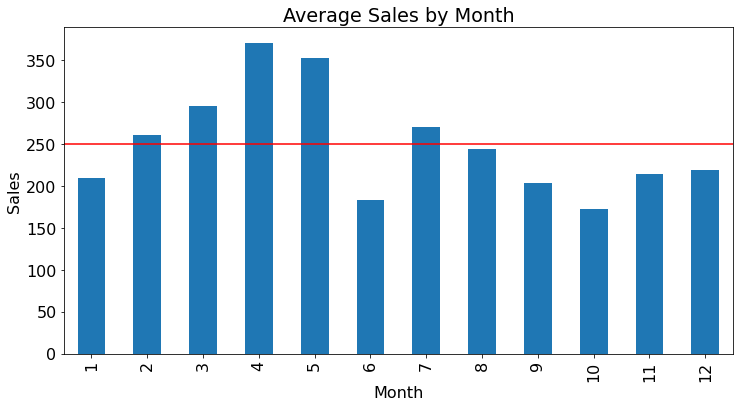

In [107]:
overall_mean = train.groupby(train.index.month).sales.mean().mean()
train.groupby(train.index.month).sales.mean().plot.bar()
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.axhline(overall_mean,color="r")

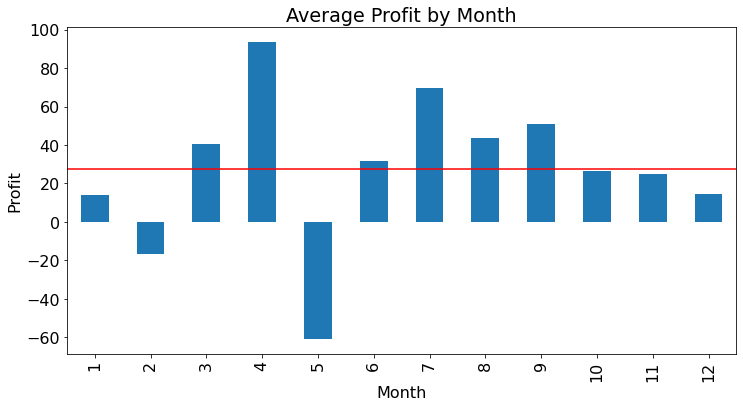

In [108]:
overall_mean = train.groupby(train.index.month).profit.mean().mean()
train.groupby(train.index.month).profit.mean().plot.bar()
plt.title("Average Profit by Month")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.axhline(overall_mean,color="r")

In [128]:
monthly_sales_average = train.groupby(train.index.month).sales.mean()

In [130]:
monthly_sales_average.mean()

249.7820755369061

In [197]:
for month in train.index.month.unique():
    t,p = stats.ttest_1samp(train[train.index.month == month].sales,monthly_sales_average.mean())
    print(month, t, p<0.05)

1 -0.824591090289346 False
2 0.162398063284706 False
3 0.725238352828749 False
4 0.8743903229106252 False
5 0.6101875096062964 False
6 -1.6655096815377994 False
7 0.29080881519255497 False
8 -0.10170465532773224 False
9 -1.1548503920098578 False
10 -1.5974985721181685 False
11 -0.7512324267455704 False
12 -0.785861845637211 False


### No month has significantly different average sales than the overall average

## Visualize change over time

Text(0.5, 1.0, 'Month over month change in total profit - very choppy')

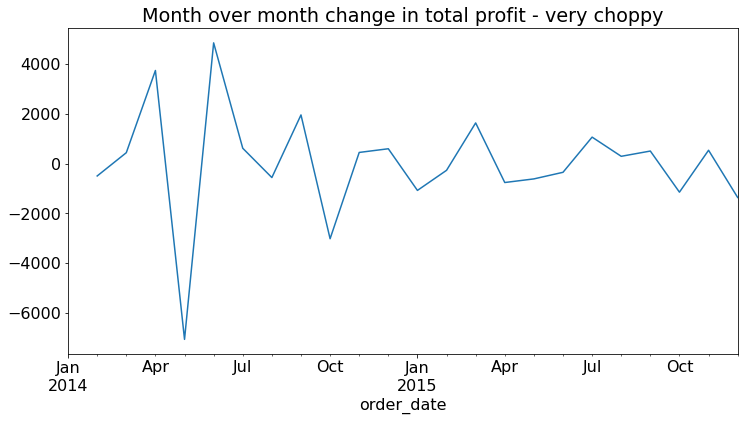

In [274]:
train.profit.resample('M').sum().diff().plot()
plt.title("Month over month change in total profit - very choppy")

Text(0.5, 1.0, 'Week over week change in total profit')

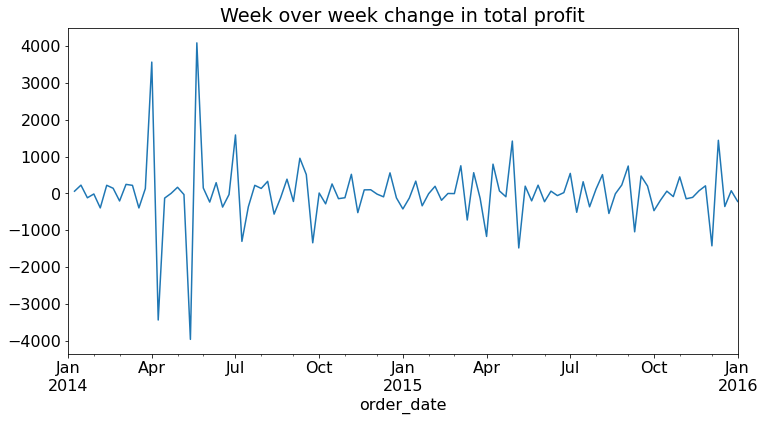

In [275]:
train.profit.resample('W').sum().diff().plot()
plt.title("Week over week change in total profit")

Seasonal plot

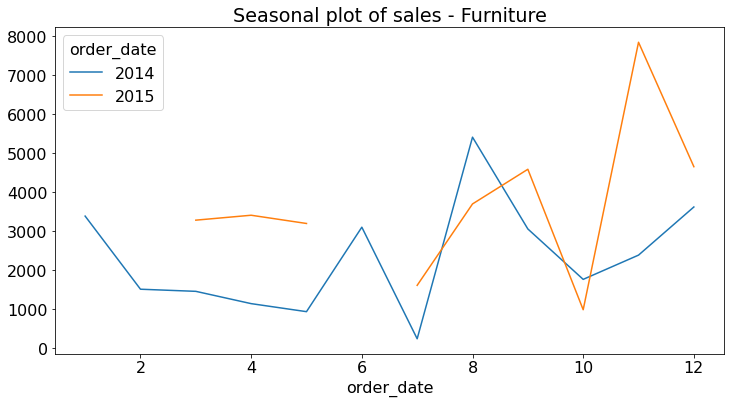

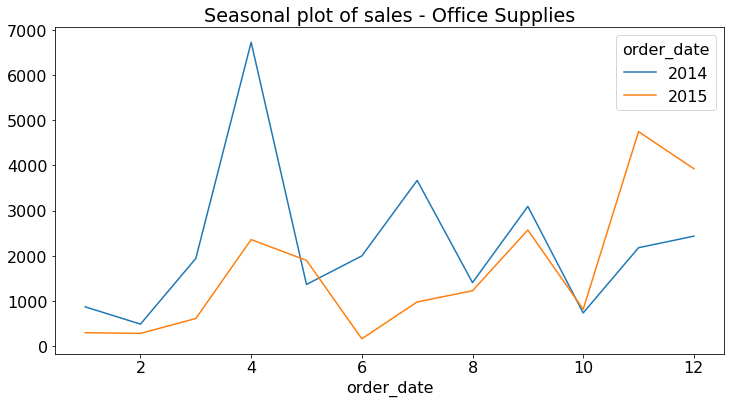

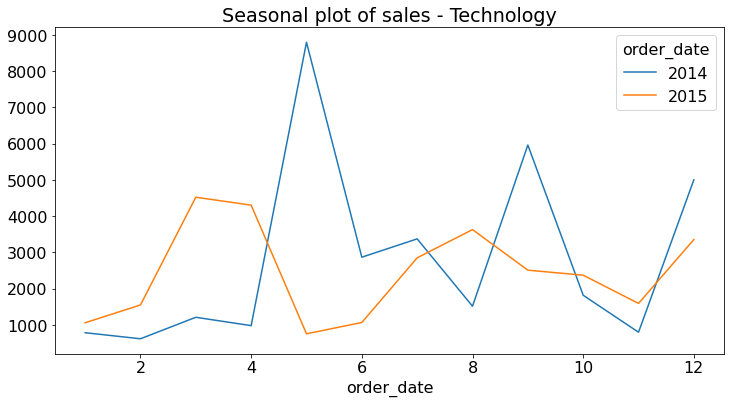

In [214]:
for cat in train.category.unique():
    sample = train[train.category == cat]
    sample.groupby([sample.index.year, sample.index.month]).sales.sum().unstack(0).plot()
    plt.title(f"Seasonal plot of sales - {cat}")

### Furniture and Office Supplies follow somewhat seasonal tendency in the second half of the year

Text(0.5, 1.0, 'Seasonal plot of profit')

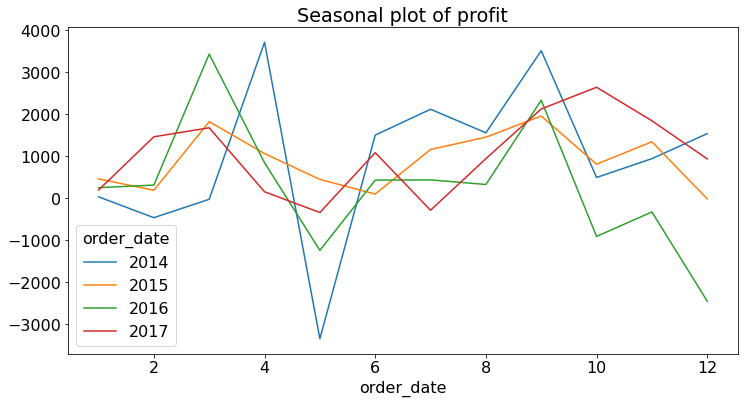

In [341]:
df.groupby([df.index.year, df.index.month]).profit.sum().unstack(0).plot()
plt.title("Seasonal plot of profit")

In [232]:
weekly_sales = train.resample('W').sales.sum()

Text(0.5, 1.0, 'No real relationship in lag plot of 1 week')

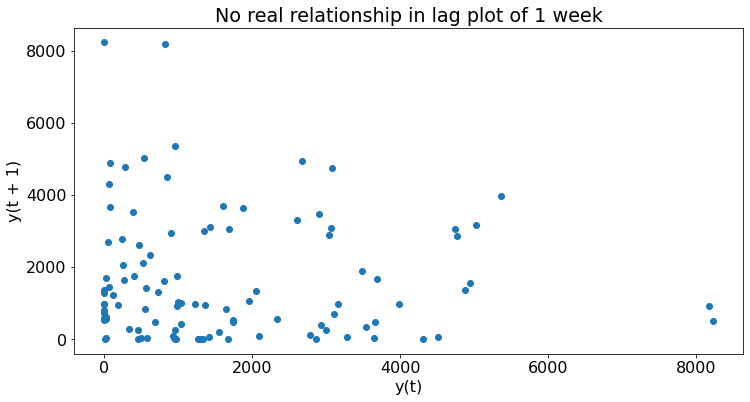

In [233]:
pd.plotting.lag_plot(weekly_sales, lag = 1)
plt.title("No real relationship in lag plot of 1 week")

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

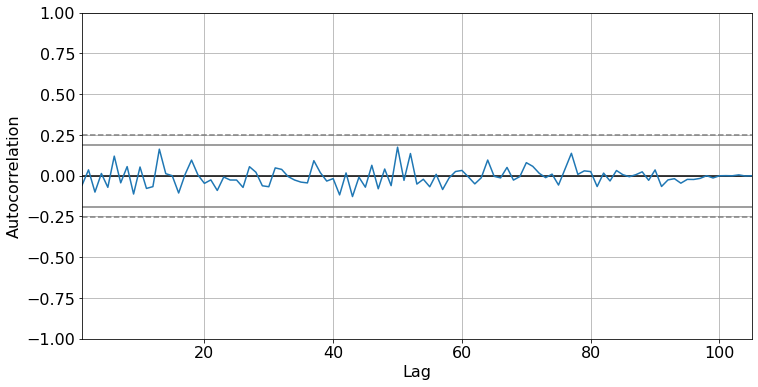

In [234]:
pd.plotting.autocorrelation_plot(weekly_sales)

### Visualize categories % of sales over time

In [259]:
weekly_sales_by_cat = train.groupby(['category']).resample('W').sales.sum().unstack().fillna(0).T

In [263]:
weekly_sales_by_cat

category,Furniture,Office Supplies,Technology
order_date,,,
2014-01-05,1951.4775,0.000,0.000
2014-01-12,831.9360,209.416,0.000
2014-01-19,399.0000,501.972,102.104
2014-01-26,196.7360,157.794,682.910
2014-02-02,389.6960,18.648,0.000
...,...,...,...
2015-12-06,2106.6760,70.038,721.490
2015-12-13,1305.9150,1772.762,399.960
2015-12-20,37.7400,1332.385,503.930


In [267]:
weekly_sales_by_cat=weekly_sales_by_cat.assign(furniture_pct = lambda row: row.Furniture/(row.Furniture+row["Office Supplies"]+row.Technology))
weekly_sales_by_cat=weekly_sales_by_cat.assign(os_pct = lambda row: row["Office Supplies"]/(row.Furniture+row["Office Supplies"]+row.Technology))
weekly_sales_by_cat=weekly_sales_by_cat.assign(tech_pct = lambda row: row.Technology/(row.Furniture+row["Office Supplies"]+row.Technology))

Text(0.5, 1.0, 'Percentage of total sales by category over time')

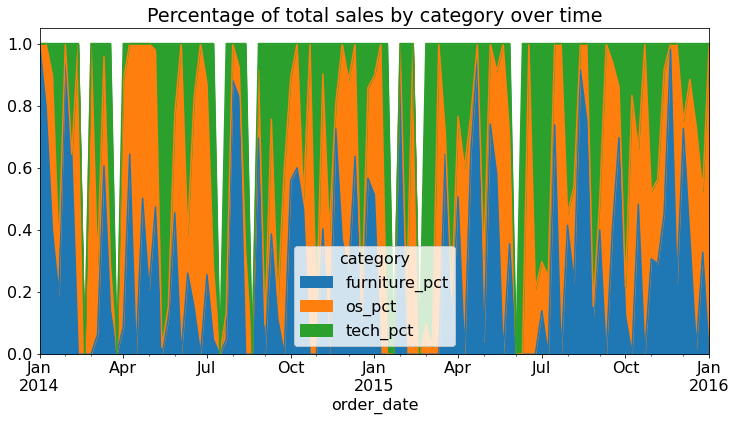

In [271]:
weekly_sales_by_cat[['furniture_pct','os_pct','tech_pct']].plot.area()
plt.title("Percentage of total sales by category over time")

In [344]:
df[['sales','profit','quantity','category']]

,sales,profit,quantity,category
order_date,,,,
2014-01-04,261.9600,41.9136,2.0,Furniture
2014-01-04,731.9400,219.5820,3.0,Furniture
2014-01-04,957.5775,-383.0310,5.0,Furniture
2014-01-09,22.3680,2.5164,2.0,Office Supplies
2014-01-09,15.5520,5.4432,3.0,Office Supplies
...,...,...,...,...
2017-12-30,47.7440,14.9200,4.0,Office Supplies
2017-12-30,434.3520,43.4352,3.0,Office Supplies
2017-12-30,3.5520,0.4440,2.0,Office Supplies
